In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from itertools import combinations
from collections import Counter

#### Combine All Sales Data

In [37]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales_Data')]

year_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    year_data = pd.concat([year_data,df])

year_data.to_csv("./Sales_Data/2019_Year_Sales.csv", index = False)

#### Read Combined Data File

In [38]:
year_data = pd.read_csv("./Sales_Data/2019_Year_Sales.csv")
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Data

#### Remove Empty Rows

In [39]:
year_data = year_data.dropna(how='all')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Clean Non-Date Data From Order Date Column

In [40]:
year_data = year_data[year_data['Order Date'].str[0:2]!='Or']

#### Change Quantity Order and Price Each Column to Numeric Column Type

In [41]:
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'])
year_data['Price Each'] = pd.to_numeric(year_data['Price Each'])

#### Create a Month Column

In [42]:
year_data['Month']= pd.to_numeric(year_data['Order Date'].str[0:2])
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a Sales Column

In [43]:
year_data['Sales'] = year_data['Quantity Ordered'] * year_data['Price Each']

#### Add a City Column

In [44]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

year_data['City'] = year_data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")

#### Change Order Date Column to Date Time Type

In [45]:
year_data['Order Date'] = pd.to_datetime(year_data['Order Date'], format='%m/%d/%y %H:%M')

#### Create Hour and Minute Columns

In [46]:
year_data['Hour'] = year_data['Order Date'].dt.hour
year_data['Minute'] = year_data['Order Date'].dt.minute

## Month With Best Sales

#### Monthly Sales Sorted By Most Sales to Least

In [47]:
results = year_data.groupby('Month').sum()
results.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
12,309254,50472569.51,50747876.74,3959758,8063902
10,249733,40871103.13,41103995.68,3197150,6582807
4,226138,37044381.22,37297372.64,2884849,5986046
11,217778,34986607.48,35195635.20,2803515,5700541
5,205337,34486376.43,34678674.25,2626580,5366889
3,187055,30703286.13,30878104.18,2408659,4923149
7,176792,28957935.16,29125533.36,2267859,4590839
6,167783,28182281.71,28355824.86,2150808,4426796
8,147928,24533799.62,24689146.68,1895179,3892427


##### We see that December has the most sales and January has the least sales

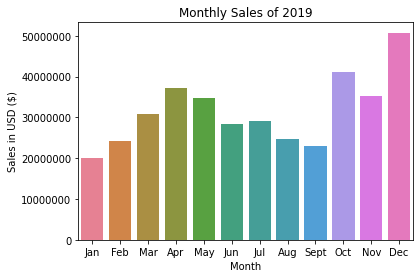

In [48]:
month_label = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 
ax = sns.barplot(x=month_label, y=results['Sales'], hue = month_label)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False)) #We want the full value of sales to be shown
ax.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.xticks(month_label)
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales of 2019')
plt.show()

## City With Most Sales

#### Sales For Each City Sorted By Most Sales to Least

In [49]:
results = year_data.groupby(['City']).sum()
results.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
San Francisco CA,552629,90326079.14,3470720,90884243.01,7075915,14514247
Los Angeles CA,366179,59635787.53,2291575,59978278.80,4701884,9533018
New York City NY,307252,50989079.13,1933151,51307491.73,3934656,8069578
Boston MA,247808,40011507.47,1552232,40278062.11,3170475,6494862
Atlanta GA,182622,30578990.20,1152734,30750484.38,2356904,4872252
Dallas TX,184030,30278906.02,1150820,30447729.40,2358290,4786705
Seattle WA,182083,30066256.11,1154351,30225310.28,2346212,4800048
Portland OR,124333,20466140.42,776831,20578055.74,1588631,3250863
Austin TX,122683,19908609.71,768119,20015399.25,1561406,3179660


##### We see that San Francisco CA has the most sales and Portland ME has the least sales

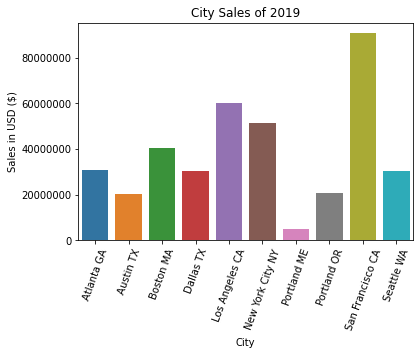

In [50]:
city_label = [city for city, df in year_data.groupby('City')] #Keep the order of cities as the order in the groupby when making axis
ax = sns.barplot(x=city_label, y=results['Sales'], hue = city_label)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False)) #We want the full value of sales to be shown
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=70)
plt.xlabel('City')
plt.xticks(city_label)
plt.ylabel('Sales in USD ($)')
plt.title('City Sales of 2019')
plt.show()

What Time Should Advertisements Be Shown To Maximize the Likelihood of Customer's Buying Products?

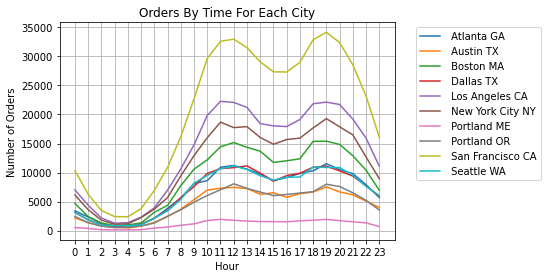

In [51]:
hours = [hour for hour, df in year_data.groupby(['Hour'])]
hour_data = year_data.groupby(['City','Hour']).count().reset_index()

sns.lineplot(x='Hour', y='Product',data = hour_data, hue='City')

plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.title('Orders By Time For Each City')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

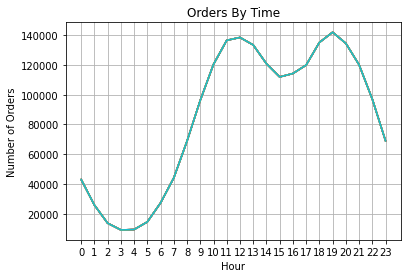

In [52]:
#hours = [hour for hour, df in year_data.groupby(['Hour'])]
#hour_data = year_data.groupby('Hour').count().reset_index()

plt.plot(hours, year_data.groupby(['Hour']).count())

plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.title('Orders By Time')
plt.grid()
plt.show()

##### Based on the chart's peak time for orders, I would recommend advertising at around 11 am or 7 pm for maximal effect.

### Products That Are Most Often Sold Together

In [62]:
df = year_data[year_data['Order ID'].duplicated(keep=False)] #We want orders where more than one type of item was bought
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(set(x)))
df = df[['Order ID', 'Grouped']].drop_duplicates() #We want independent purchases not the same orders & items

In [65]:
count = Counter()
combo = 2 #number of items sold together, can change to display higher combos
for row in df['Grouped']:
    row_items = row.split(',')
    count.update(Counter(combinations(row_items,combo)))

print("Products Most Sold Together In Order")
for key, value in count.most_common(10):
    print(key, value, "orders")

Products Most Sold Together In Order
('Lightning Charging Cable', 'iPhone') 1010 orders
('Google Phone', 'USB-C Charging Cable') 997 orders
('Wired Headphones', 'iPhone') 462 orders
('Wired Headphones', 'Google Phone') 422 orders
('Apple Airpods Headphones', 'iPhone') 373 orders
('USB-C Charging Cable', 'Vareebadd Phone') 368 orders
('Bose SoundSport Headphones', 'Google Phone') 228 orders
('Wired Headphones', 'USB-C Charging Cable') 203 orders
('Wired Headphones', 'Vareebadd Phone') 149 orders
('Lightning Charging Cable', 'Wired Headphones') 128 orders


##### So the products most sold together are the Lightning Charging Cable and the iPhone at 1010 orders. I would recommend looking into combining these top 10 combinations of items together for promotions.

#### The Most Sold Product

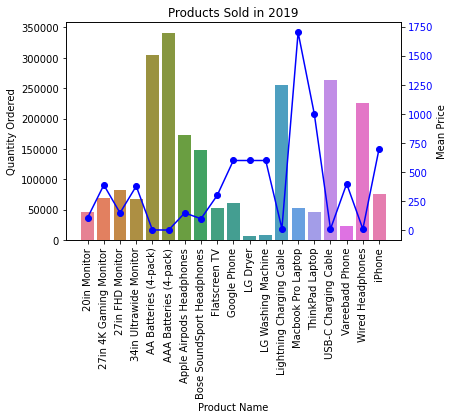

In [81]:
product_group = year_data.groupby('Product')
num_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
ax = sns.barplot(x=products, y=num_ordered, hue = products)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False)) #We want the full value of sales to be shown
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.xticks(products)
plt.ylabel('Quantity Ordered')
plt.title('Products Sold in 2019')
ax2 = ax.twinx()
prices = year_data.groupby('Product').mean()['Price Each']
ax2.plot(products, prices, color='b', marker='o', label='Mean Price')  # Adjust color and marker as needed
ax2.set_ylabel('Mean Price')
ax2.tick_params(axis='y', labelcolor='b')

plt.show()

##### So 4-Pack AA and AAA Batteries and the Lightning Charging Cable are the most sold products in 2019. However they have a low mean price possibly impacting consumers to be more lenient to buy. While other more expensive products such as the LG Dryer are more expensive and have a overall smaller quantity ordered. 